In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) 

In [49]:
data = np.loadtxt("/content/цена таб.txt",dtype=np.float64,delimiter=",")
data[:5,::] 

array([[  41.,    2., 2650.],
       [  59.,    3., 3000.],
       [  43.,    2., 2770.],
       [  60.,    2., 4990.],
       [  62.,    3., 3500.]])

In [50]:

X = data[::,0:2]
Y = data[::,-1:]

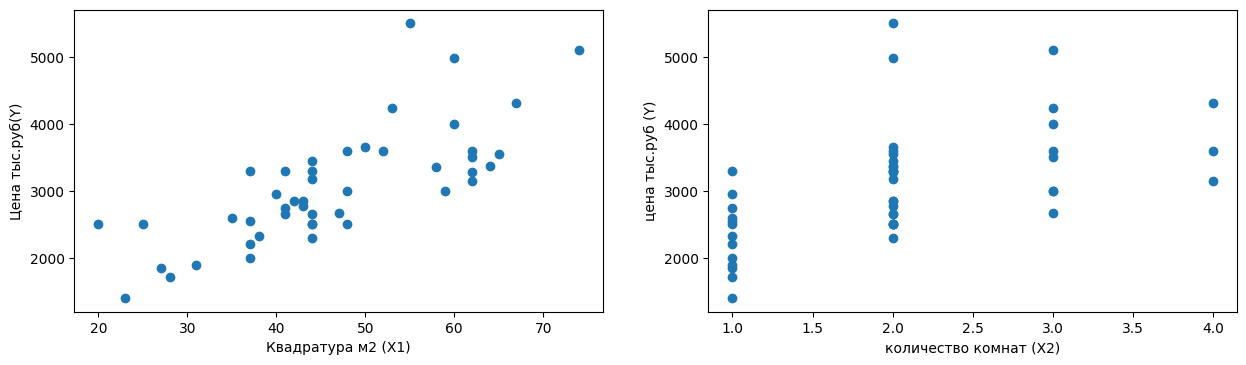

In [51]:
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("Квадратура м2 (X1)")
plt.ylabel("Цена тыс.руб(Y)")
plt.subplot(122)
plt.scatter(X[::,-1:],Y)
plt.xlabel("количество комнат (X2)")
plt.ylabel("цена тыс.руб (Y)")
plt.show()


In [52]:
Theta = np.random.rand(1,3)
m,n = X.shape
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
print ("X_bias = \n",X_bias[0:5,:])
print ("Y = \n",Y[0:5,::])

X_bias = 
 [[ 1. 41.  2.]
 [ 1. 59.  3.]
 [ 1. 43.  2.]
 [ 1. 60.  2.]
 [ 1. 62.  3.]]
Y = 
 [[2650.]
 [3000.]
 [2770.]
 [4990.]
 [3500.]]


In [53]:

mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:])
size_std = np.std(X_bias[::,1:2])
bedroom_std = np.std(X_bias[::,2:])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std) 
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom)/ (bedroom_std)
X_bias[0:5,::]

array([[ 1.        , -0.42792795, -0.02567481],
       [ 1.        ,  1.024221  ,  1.15536637],
       [ 1.        , -0.26657807, -0.02567481],
       [ 1.        ,  1.10489594, -0.02567481],
       [ 1.        ,  1.26624582,  1.15536637]])

In [54]:
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [55]:
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Интерация vs Цена ")
    plt.xlabel("кол=во интераций")
    plt.ylabel("цена Theta")
    plt.show()
    return Theta

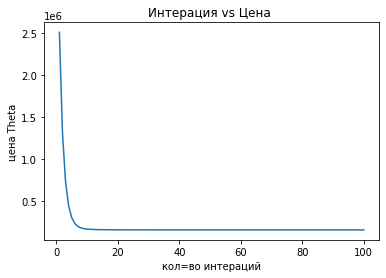

[[3061.          660.53976445  -26.69228209]]


In [56]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print (Theta)

In [57]:
X_predict = np.array([1.0,32.0,1]) 
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print ("Прогнозируемая цена 1 комнатной квартиры 32 кв.м в сеймском районе курска тыс.руб ",hypothesis)


Прогнозируемая цена 1 комнатной квартиры 32 кв.м в сеймском районе курска тыс.руб  [2330.94551248]
